# Handwritten Digits Dataset

In this notebook we will apply the LogitBoost algorithm to identify handwritten digits.

In [1]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from logitboost import LogitBoost

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Loading the data

We use the [UCI ML handwritten digits dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits), imported from [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).
This dataset contains $1797$ $8 \times 8$ samples of handwritten digits.
After shuffling the data, we split them into training and testing sets.

In [2]:
X, y = load_digits(return_X_y=True)

# Shuffle data and split it into training/testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1 / 3),
                                                    shuffle=True, stratify=y,
                                                    random_state=0)

### Digits in the training set

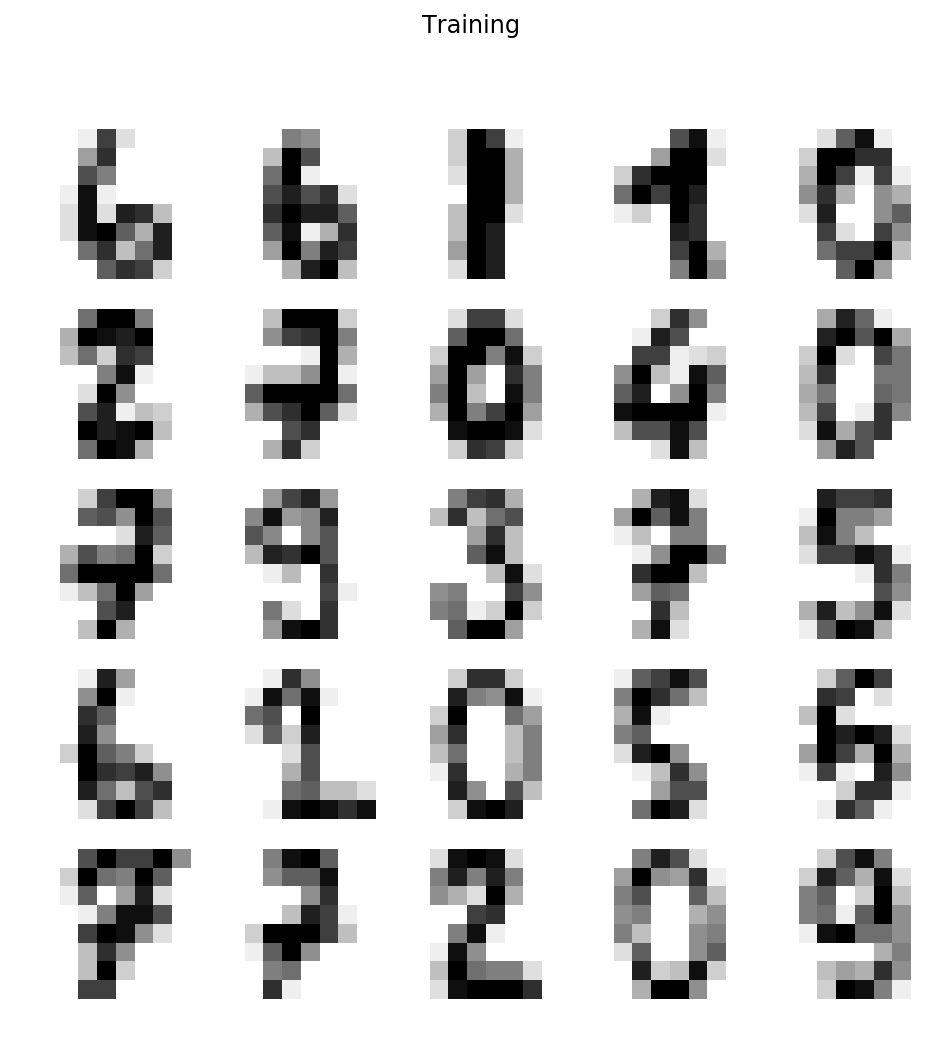

In [3]:
nrows = 5
ncols = 5

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 8))
k = 0
for i, j in product(range(nrows), range(ncols)):
    k = ncols * i + j
    digit = X_train[k].reshape((8, 8))
    ax[i, j].imshow(digit, cmap="binary")
    ax[i, j].axis("off")

fig.suptitle("Training")

plt.show()
plt.close()

### Digits in the testing set

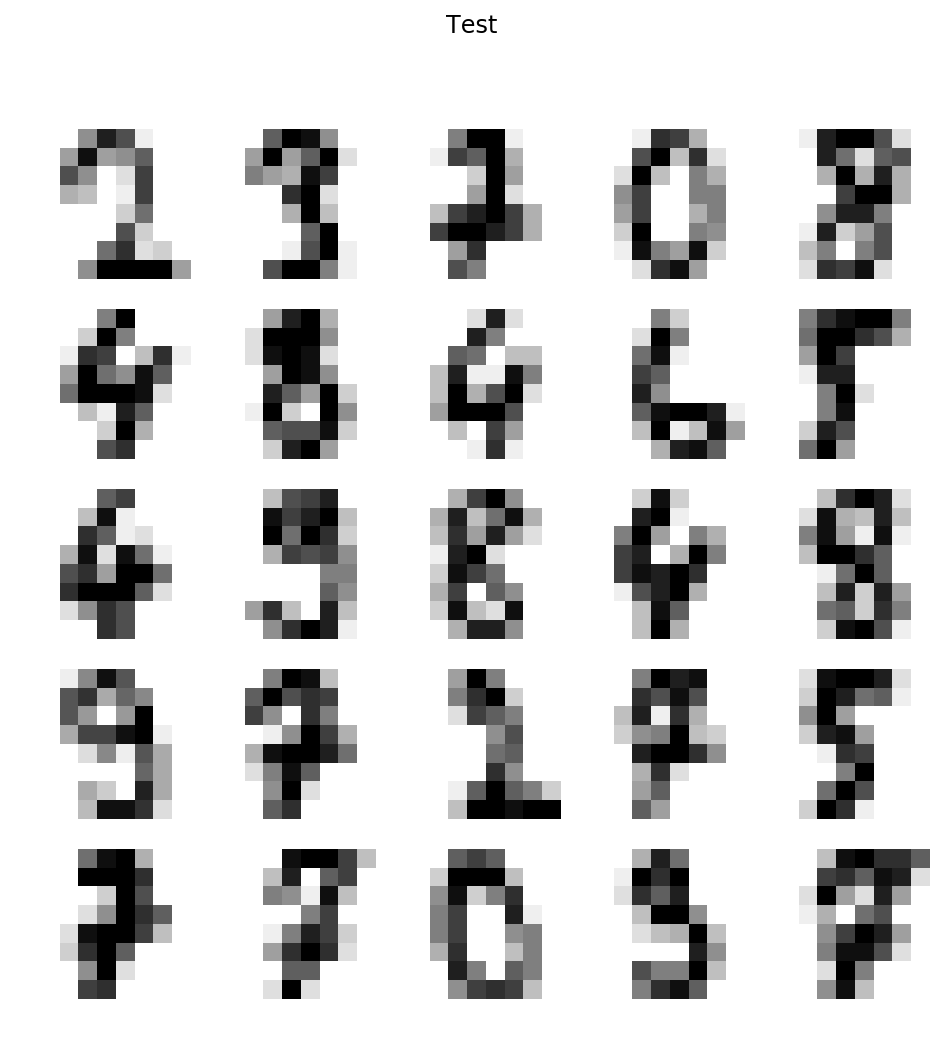

In [4]:
nrows = 5
ncols = 5

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 8))
k = 0
for i, j in product(range(nrows), range(ncols)):
    k = ncols * i + j
    digit = X_test[k].reshape((8, 8))
    ax[i, j].imshow(digit, cmap="binary")
    ax[i, j].axis("off")

fig.suptitle("Test")

plt.show()
plt.close()

## Fitting the LogitBoost model

Next, we initialize a LogitBoost classifier and fit it to the training data.
By default, LogitBoost uses decision stumps as its base estimator.

In [5]:
%%time

lboost = LogitBoost(random_state=0)
lboost.fit(X_train, y_train)

CPU times: user 1.6 s, sys: 34.3 ms, total: 1.63 s
Wall time: 1.7 s


## Prediction accuracy

As a first indicator of how well the model predicts the correct labels, we can check its accuracy score (number of correct predictions over the number of total predictions) on the training and test data.
If the classifier is good, then the accuracy score should be close to 1.

In [6]:
y_pred_train = lboost.predict(X_train)
y_pred_test = lboost.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Training accuracy: {accuracy_train:.4f}")
print(f"Testing accuracy:  {accuracy_test:.4f}")

Training accuracy: 1.0000
Testing accuracy:  0.9516


## Precision and Recall

We can also check LogitBoost's precision and recall.

In [7]:
report_train = classification_report(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test)
print(f"Training\n{report_train}")
print(f"Testing\n{report_test}")

Training
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       119
          1       1.00      1.00      1.00       121
          2       1.00      1.00      1.00       118
          3       1.00      1.00      1.00       122
          4       1.00      1.00      1.00       121
          5       1.00      1.00      1.00       121
          6       1.00      1.00      1.00       121
          7       1.00      1.00      1.00       119
          8       1.00      1.00      1.00       116
          9       1.00      1.00      1.00       120

avg / total       1.00      1.00      1.00      1198

Testing
             precision    recall  f1-score   support

          0       1.00      0.97      0.98        59
          1       0.91      0.98      0.94        61
          2       1.00      0.97      0.98        59
          3       0.89      0.95      0.92        61
          4       0.95      0.97      0.96        60
          5       0.97   